In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df1 = df[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
df1.columns = ['Age', 'Income', 'Score']
df1['Gender'] = df['Gender'] == 'Male'
df1.astype(float).head()

,Age,Income,Score,Gender
0,19.0,15.0,39.0,1.0
1,21.0,15.0,81.0,1.0
2,20.0,16.0,6.0,0.0
3,23.0,16.0,77.0,0.0
4,31.0,17.0,40.0,0.0


In [13]:
model = StandardScaler()
df_scaled = model.fit_transform(df1)
X = pd.DataFrame(df_scaled, columns=df1.columns)
X

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


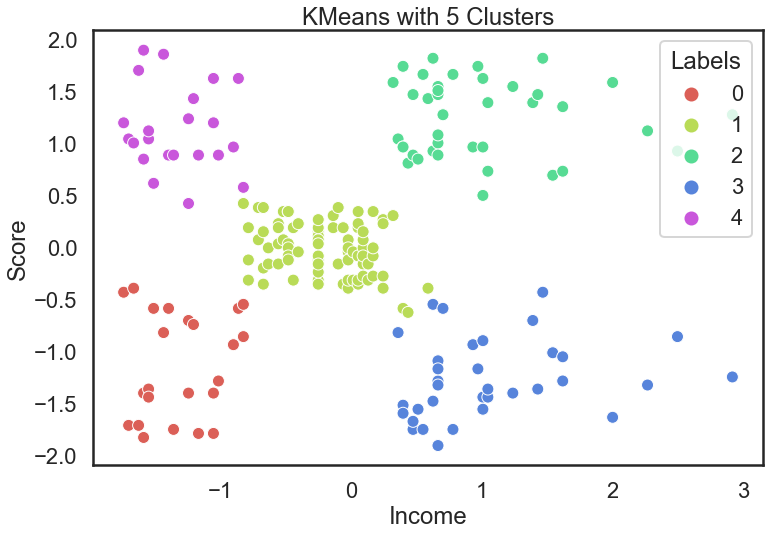

In [29]:
from sklearn.cluster import KMeans 

km5 = KMeans(n_clusters=5).fit(X[['Income','Score']])

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans with 5 Clusters')
plt.show()

## Advantages:
1. Well defined clusters are formed.
2. Easy to use

## Disadvantages:
1. Variance for each feature is spherical.
2. Ideal number of clusters is to be found out.

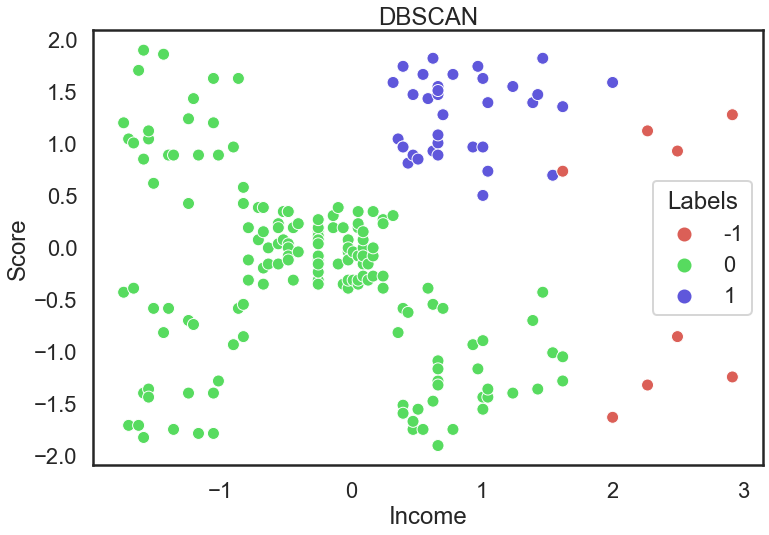

In [17]:
from sklearn.cluster import DBSCAN 

db = DBSCAN().fit(X[['Income','Score']])

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

## Advantages:
1. Finds out outliers.
2. No need to specify cluster size.

## Disadvantages:
1. Sensitive to Epsilon and min points.
2. Does not change with different densities.

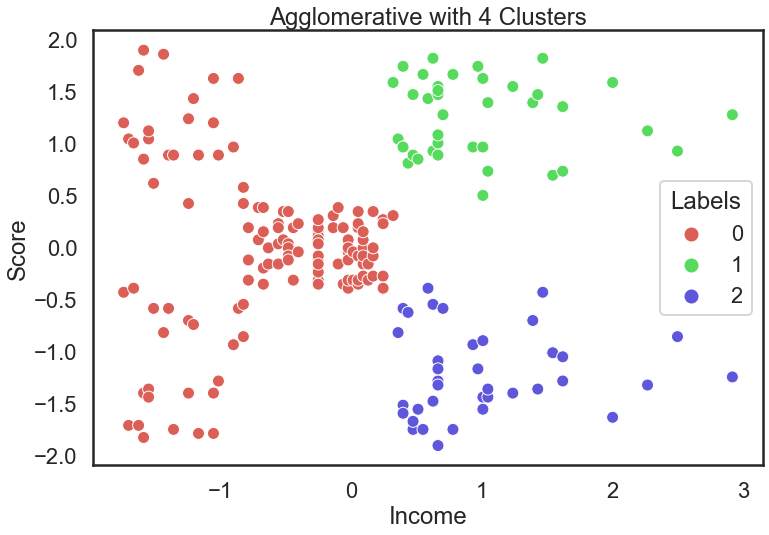

In [30]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X[['Income','Score']])

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative with 4 Clusters')
plt.show()

## Advantages:
1. Works well with uneven cluster sizes.
2. Different cluster metrics are available.

## Disadvantages:
1. No assumption of noise.
2. The number of clusters must be defined.

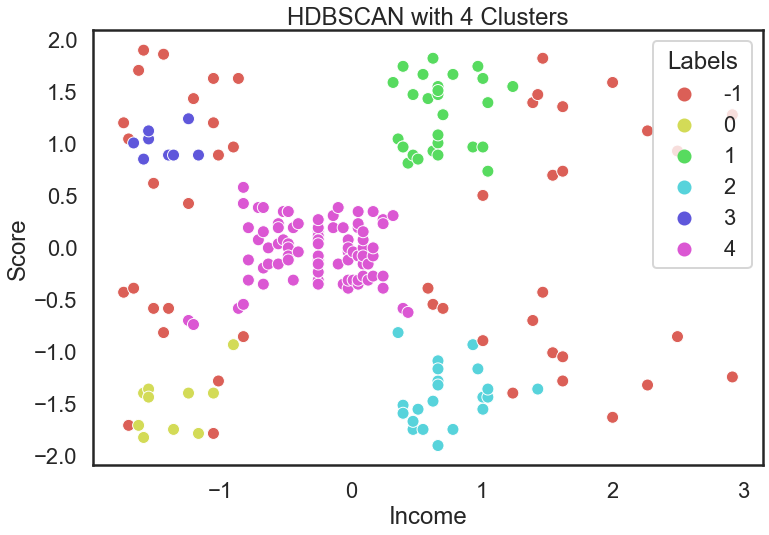

In [33]:
import hdbscan

hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=8, gen_min_span_tree=True)
hdbscan_clus.fit(X[['Income','Score']])
X['Labels'] = hdbscan_clus.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
plt.title('HDBSCAN with 4 Clusters')
plt.show()

## Advantages:
1. Find outs outliers.
2. Can work with different densities.

## Disadvantages:
1. Sensitive to min points.

In [34]:
X

,Age,Income,Score,Gender,Labels
0,-1.424569,-1.738999,-0.434801,1.128152,-1
1,-1.281035,-1.738999,1.195704,1.128152,-1
2,-1.352802,-1.700830,-1.715913,-0.886405,-1
3,-1.137502,-1.700830,1.040418,-0.886405,-1
4,-0.563369,-1.662660,-0.395980,-0.886405,-1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,-1
196,0.441365,2.497807,-0.861839,-0.886405,-1
197,-0.491602,2.497807,0.923953,1.128152,-1
198,-0.491602,2.917671,-1.250054,1.128152,-1
